In [6]:
import networkx as nx
import torch
import dgl

In [2]:
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

In [9]:
g_dgl.ndata['x'] = torch.rand(10,2)

In [14]:
g_dgl.nodes[:].data['x']

tensor([[0.3181, 0.7386],
        [0.8385, 0.3699],
        [0.0890, 0.7551],
        [0.6079, 0.4131],
        [0.6995, 0.6472],
        [0.6174, 0.4170],
        [0.4041, 0.0142],
        [0.8991, 0.5031],
        [0.0150, 0.9685],
        [0.4373, 0.6732]])

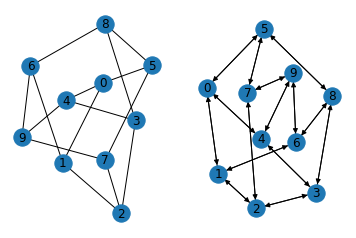

In [4]:
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx,with_labels = True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(),with_labels = True)
plt.show()

In [9]:
import torch as th

In [10]:
g = dgl.DGLGraph()
g.add_nodes(10)
for i in range(1,4):
    g.add_edge(i,0)
src = list(range(5,8));dst = [0]*3

In [11]:
g.add_edges(src,dst)

In [15]:
# nx.draw(g.to_networkx(),with_labels=True)

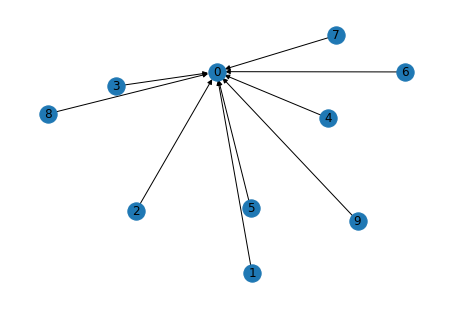

In [25]:
g.clear();
g.add_nodes(10)
src = th.tensor(list(range(1,10)))
g.add_edges(src,0)
nx.draw(g.to_networkx(),with_labels=True)
plt.show()

In [26]:
## assign features to nodes
x = th.randn(10,3)
g.ndata['x'] = x

In [30]:
g.nodes[0].data

{'x': tensor([[0.2257, 1.0414, 1.0618]])}

In [27]:
print(g.ndata['x'] == g.nodes[:].data['x'])

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)


In [33]:
g.nodes[0].data['x'] = th.zeros(1,3)
g.nodes[[0,1,2]].data['x'] = th.zeros(3,3)
g.nodes[th.tensor([0,1,2])].data['x'] = th.zeros(3,3)

In [37]:
g.nodes[:].data['x']

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [-0.1622, -2.2034,  0.2888],
        [ 0.4344, -1.5517, -0.1205],
        [-1.8920,  0.7492, -0.0922],
        [ 0.4111, -0.5760, -2.5079],
        [-1.1211,  0.1835,  0.2188],
        [ 0.4710, -0.4577, -0.9093],
        [-0.1637,  0.1276,  0.4435]])

In [48]:
## assign weights to edges
g.edata['w'] = th.randn(9,2)
g.edges[1].data['w'] = th.randn(1,2)
g.edges[[0,1,2]].data['w'] = th.zeros(3,2)

In [49]:
g.edges[:].data['w']

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-0.0877, -0.4764],
        [ 1.0863, -0.3244],
        [ 1.3758, -0.2569],
        [-0.3086, -0.1515],
        [ 0.8998, -0.2174],
        [-1.0567, -0.4482]])

In [50]:
g.nodes[:].data['x']

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [-0.1622, -2.2034,  0.2888],
        [ 0.4344, -1.5517, -0.1205],
        [-1.8920,  0.7492, -0.0922],
        [ 0.4111, -0.5760, -2.5079],
        [-1.1211,  0.1835,  0.2188],
        [ 0.4710, -0.4577, -0.9093],
        [-0.1637,  0.1276,  0.4435]])

In [45]:
g.edges[1,0].data['w'] = th.ones(1,2)

In [46]:
g.edges[:].data['w']

tensor([[ 1.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.1880,  0.6883],
        [ 1.0318,  0.2761],
        [-0.1146,  0.0855],
        [-0.8854,  0.2593],
        [ 1.2415, -1.2745],
        [ 1.2395, -0.4948]])

In [54]:
g.edges[1,0].data['w'] = th.ones(1,2)
g.edges[[4,2,3],[0,0,0]].data['w'] = th.ones(3,2)

In [55]:
g.edges[:].data['w']

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0863, -0.3244],
        [ 1.3758, -0.2569],
        [-0.3086, -0.1515],
        [ 0.8998, -0.2174],
        [-1.0567, -0.4482]])

In [57]:
print(g.edge_attr_schemes())

{'w': Scheme(shape=(2,), dtype=torch.float32)}


In [56]:
print(g.node_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32)}


In [64]:
g.ndata['x'] = th.zeros((10,4))

In [65]:
## after pop ,there is no attribute for nodes 
x_attr = g.ndata.pop('x')

In [62]:
g.nodes[:]

NodeSpace(data={})

In [66]:
# mutilgraph

In [70]:
g_multi = dgl.DGLGraph(multigraph = True)
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10,2)

In [72]:
g_multi.add_edges(list(range(1,10)),0)
g_multi.add_edge(1,0)
g_multi.edata['w'] = th.randn(10,2)
g_multi.edges[1].data['w'] = th.zeros(1,2)
print(g_multi.edges())

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [73]:
print(g_multi.edata['w'])

tensor([[ 1.6881,  1.8446],
        [ 0.0000,  0.0000],
        [ 0.7013,  0.6069],
        [ 0.8476,  0.5063],
        [-0.2517,  0.8336],
        [-0.3113, -0.0447],
        [-0.4981, -0.9989],
        [ 0.8362, -0.4236],
        [-0.8158,  0.6569],
        [-1.5994,  1.1305]])


In [74]:
# get the id from 
eid = g_multi.edge_id(1,0)

In [75]:
eid

tensor([0, 9])